## Running the contour fitting algorithm

The contour fitting is an iterative process and it might happen that the iterations that where specified in the beginning are not enough to fully converge the fit. In this case you **do not** have to run the complete fitting again, but can continue where you left off.

In [1]:
%pylab inline
import sys, os
sys.path.insert(1, "/home/berliner/08 GitHub/PointObject")
sys.path.insert(1, "/home/berliner/08 GitHub/PointObject/lib")

import numpy as np
from IPython.display import HTML


from PointObject import PointObject
from HTMLtable   import HTMLtable

htmlTable = HTMLtable()

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Loading a PointObject()
from utils import loadPointObject
mito = loadPointObject('/tmp/my_mito_pointobject.p')

Loading /tmp/my_mito_pointobject.p


Now let's try to find the optimal settings for the contour fitting. But we will set the number of iterations too low so that the contour will not be closed.

Testing 8 parameter combinations
Finished contour parameter screen: 0:00:43


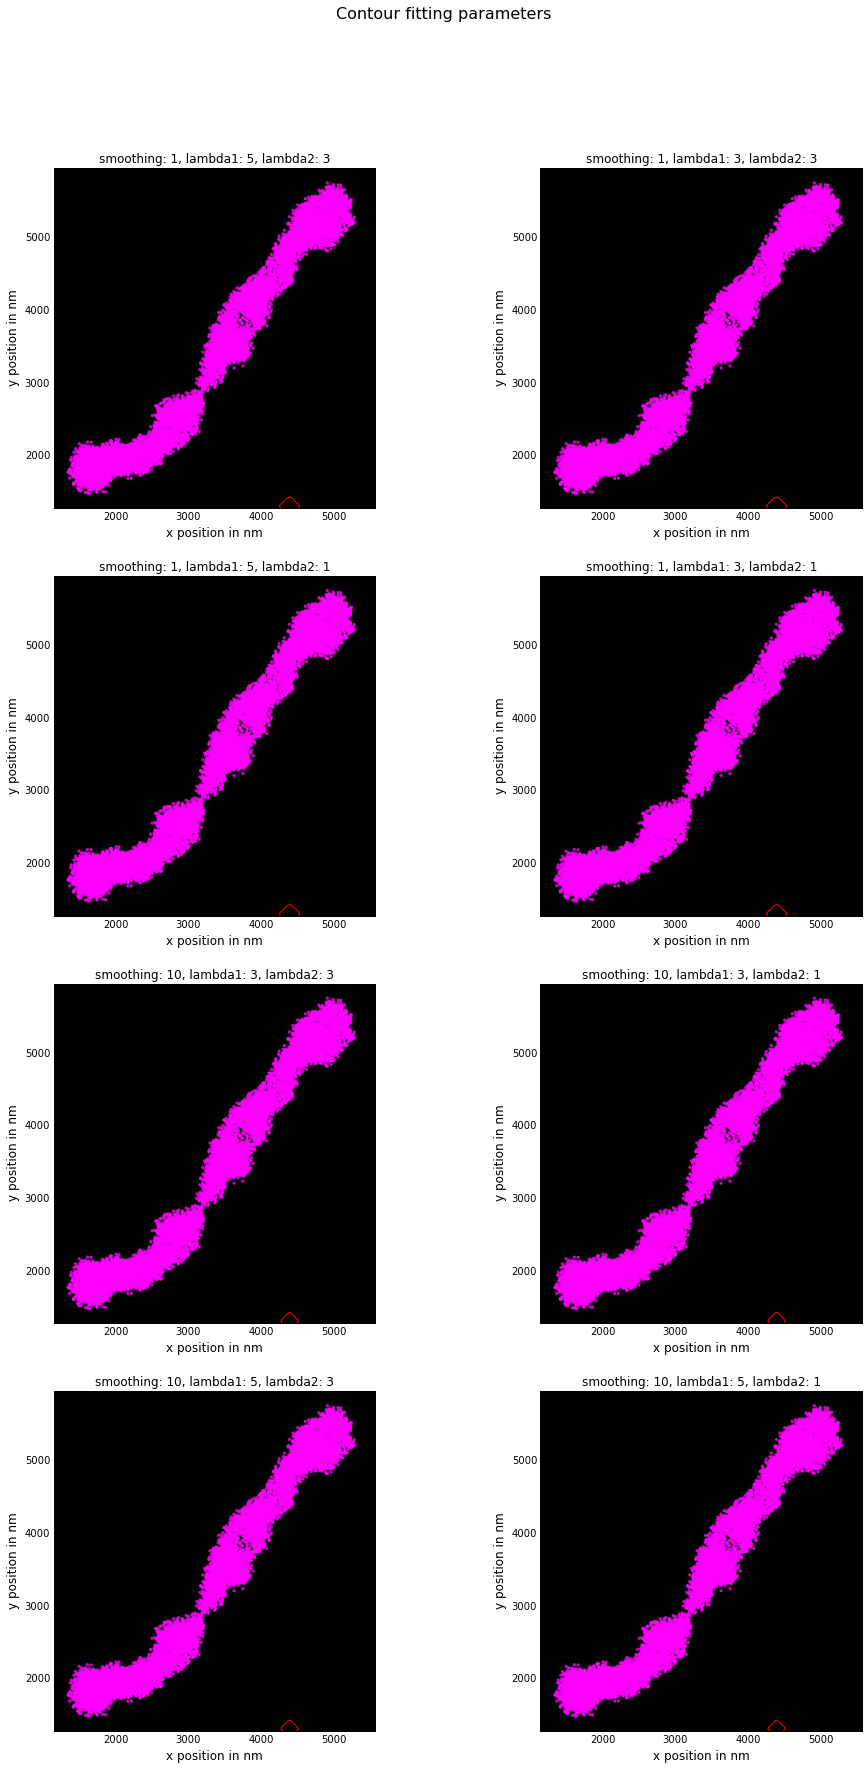

In [3]:
frame = 2
smoothing = [1,10]
lambda1   = [3,5]
lambda2   = [1,3]

mito.contour.findFittingParameters(frame, smoothing, lambda1, lambda2, iterations=20)

So now we see that the contour fitting is not nearly finished and we can run some more iterations
```python 
    def advanceFindFittingParameters(iterations=100):
        """
        Run more iterations of the findFittingParameters() call.
        
        If the iterations defined when calling the findFittingParameters() function
        do not suffice to finish the contour fitting, this function can be used
        to run more iterations of the fitting routine without having to run everything
        from the start again.
        
        Input:
          iterations (int):  Number of additional iterations that should be run.
          
        """
```
where we see that the contour advanced a tiny bit.

Finished additional iterations in: 0:03:32


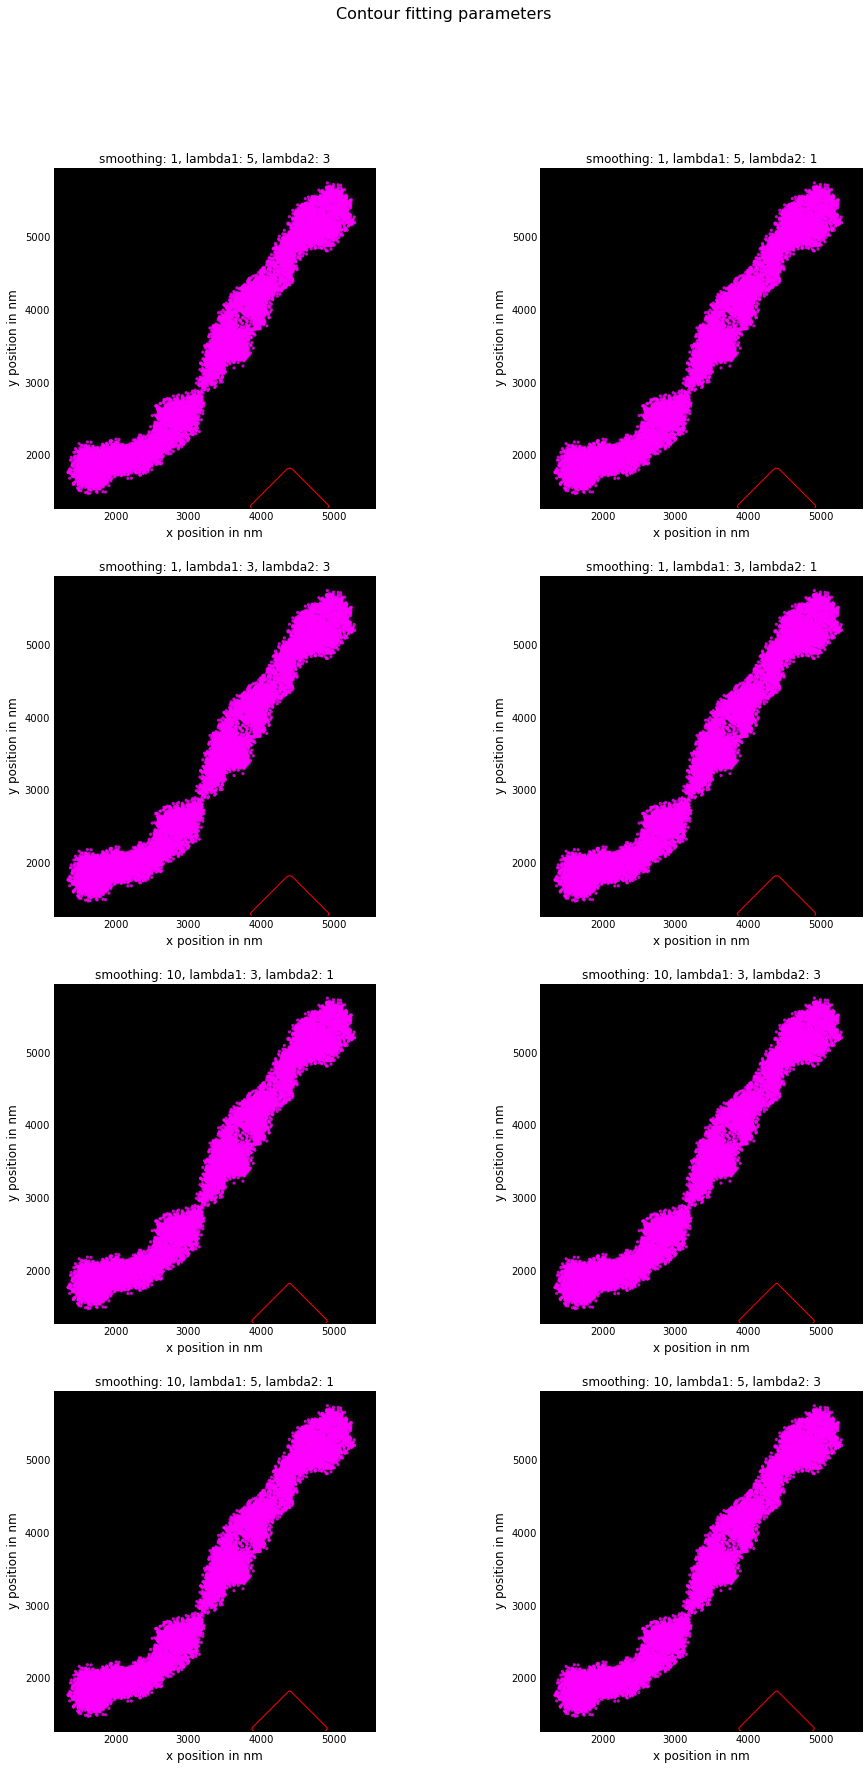

In [4]:
mito.contour.advanceFindFittingParameters(100)

Now let's assume we found the perfect parameters and we can run our contour fitting

Finished contour fitting in: 0:00:04


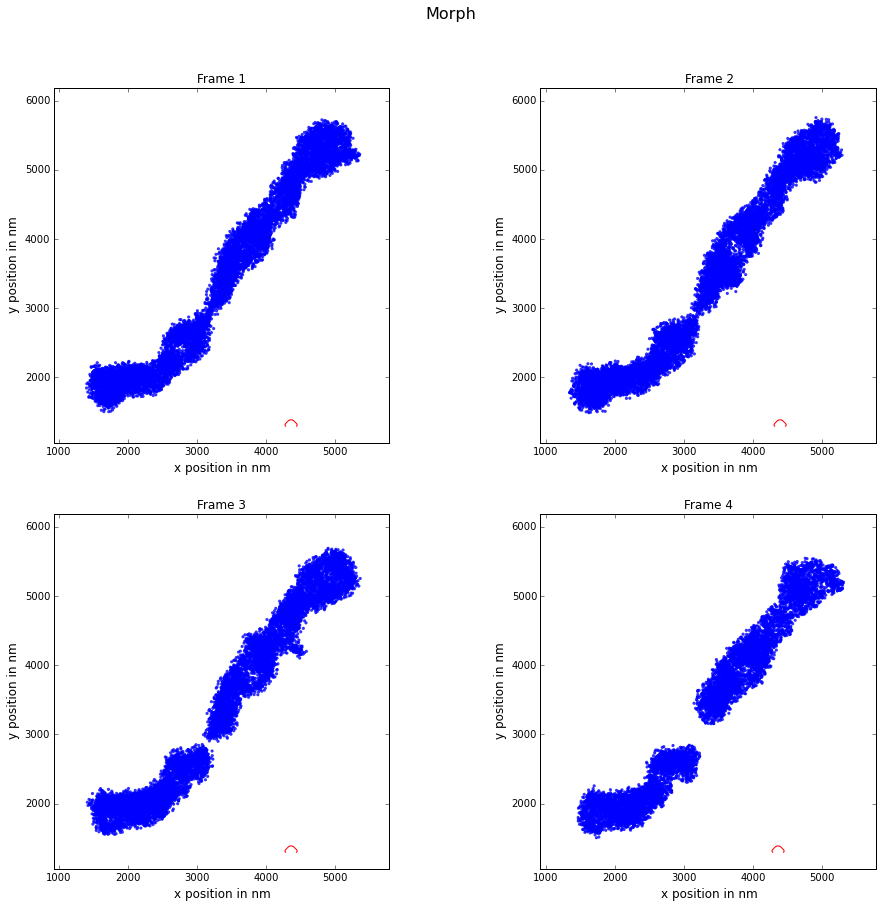

In [5]:
mito.calculateContour(smoothing=1, lambda1=5, lambda2=1, kde=False, iterations=10)

Since we did not yet run enough iterations we can progress further by calling `advanceContourMorph()`.
```python
    def advanceContourMorph(iterations=500, frame=None):
        """
        Run more iterations of the contour fitting.
        
        If the contour fitting algorithm did not yet converge run more iterations.
        If frame is specified only this frame will be run (might be beneficial if
        many frames would have to be run othermise).
        
        Input:
          iterations (int):  Number of additional iterations
          
          frame (int):       If not None sets which frame should be advanced
          
        """
```

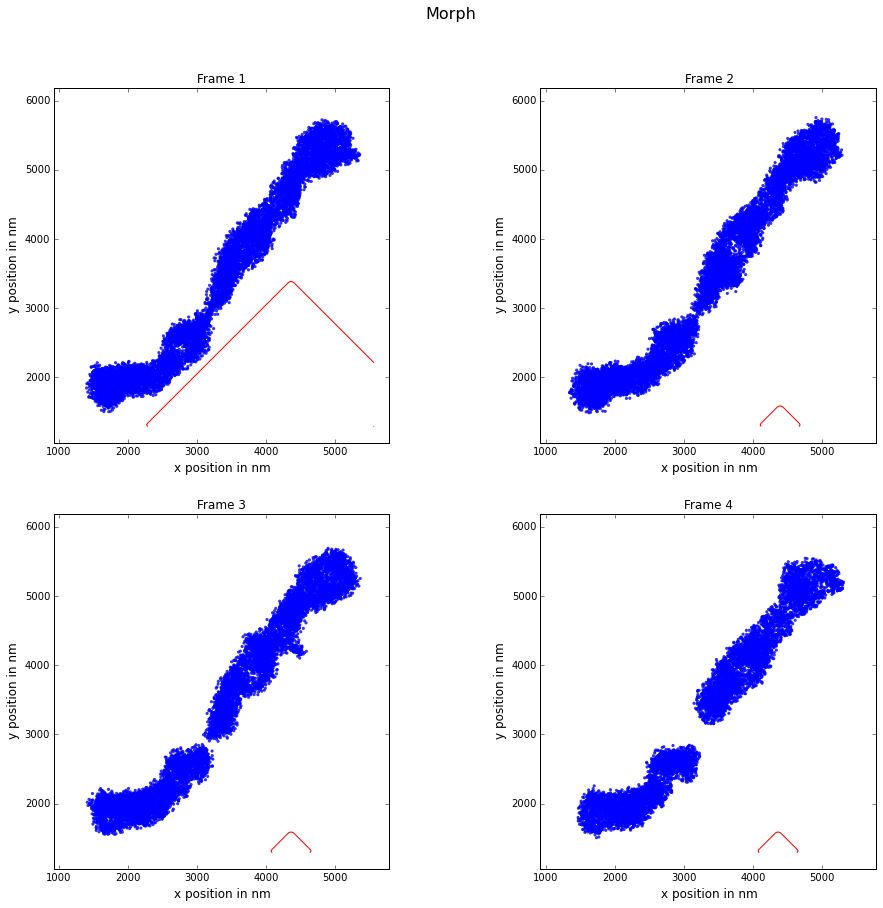

In [6]:
mito.contour.advanceContourMorph(iterations=100)